In [1]:
from collections import Counter
import pprint

## Read File in

In [2]:
!ls data/ #访谈记录.txt

alice.png  simsun.ttf  stopword.txt  访谈记录.txt


In [3]:
filename = "data/访谈记录.txt"
with open(filename) as f:
 mytext = f.read()

#print(mytext)

## Break words with Jieba

In [4]:
import jieba
mytext = " ".join(jieba.cut(mytext))

#print(mytext)

Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
Loading model cost 2.655 seconds.
Prefix dict has been built succesfully.


In [5]:
counter = Counter(mytext)
pprint.pprint(counter.most_common(10))

[(' ', 9905),
 ('，', 666),
 ('是', 500),
 ('的', 413),
 ('。', 347),
 ('个', 334),
 ('就', 328),
 ('\n', 312),
 ('角', 309),
 ('色', 308)]


## Break with PKUSEG

In [7]:
import pkuseg
from collections import Counter
import pprint

content = []
with open("data/访谈记录.txt", encoding="utf-8") as f:
    content = f.read()

lexicon = ['吃','带','角色1','角色2','角色3','角色4','角色5','角色6','角色7','角色8','角色9','角色10','角色11','角色12','角色13','角色14']  #
seg = pkuseg.pkuseg(user_dict=lexicon)  # 加载模型，给定用户词典
text = seg.cut(content)

stopwords = []

with open("data/stopword.txt", encoding="utf-8") as f:
    stopwords = f.read()

new_text = []

for w in text:
    if w not in stopwords:
        new_text.append(w)

counter = Counter(new_text)
pprint.pprint(counter.most_common(10))



[('医院', 40),
 ('科', 35),
 ('老师', 31),
 ('培训', 29),
 ('住院', 26),
 ('科室', 25),
 ('护士', 23),
 ('吃', 21),
 ('轮转', 20),
 ('带', 19)]


## Make word cloud

In [8]:
%matplotlib inline

(-0.5, 799.5, 799.5, -0.5)

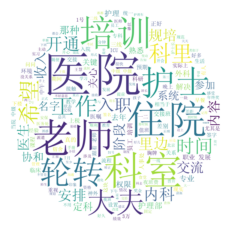

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np


x, y = np.ogrid[:800, :800]
mask = (x - 400) ** 2 + (y - 400) ** 2 > 390 ** 2
mask = 255 * mask.astype(int)


wordcloud = WordCloud(font_path="data/simsun.ttf"
                      #,width=400
                      #,height=100
                      ,background_color="white"
                      #,repeat=True
                      ,mask=mask
                     ).generate(" ".join(new_text))
#%pylab inline
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

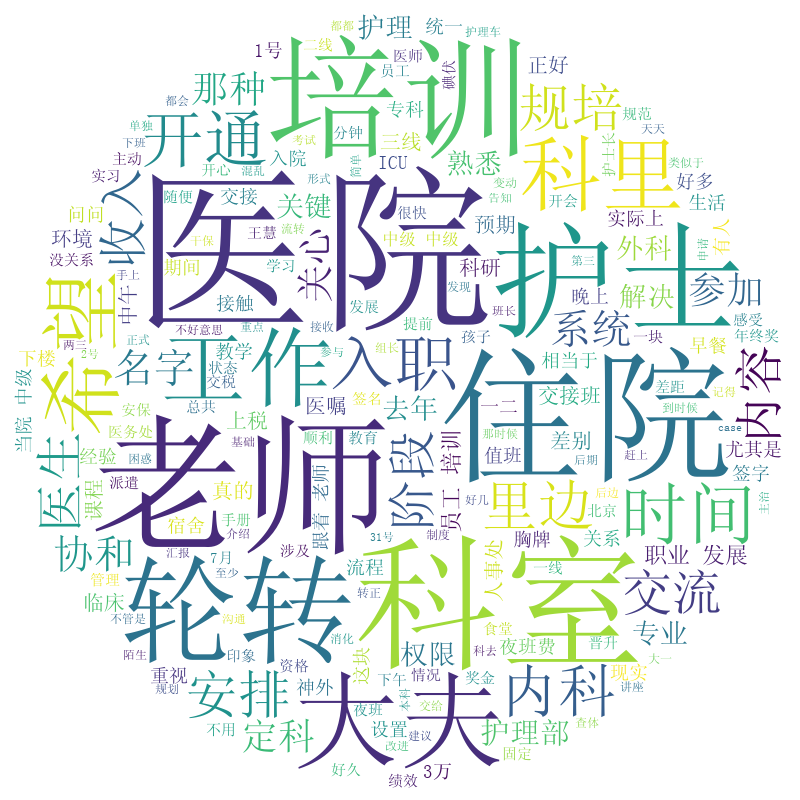

In [13]:
wordcloud.to_image()

In [14]:
wordcloud.to_file("data/zryh.png")